# Face Recognition and Labelling using OpenCV #

### Steps Involved In ### 
<ol>
<li>Importing all the necessary libraries </li><br>
<li> Loading Images using OpenCV and cropping the faces out of these images </li><br>
<li> Finding Facial Embeddings using neural Networks for all the respective faces and store these embeddings along with these labels
    </li><br>
<li> Give any arbitrary image
    <ol type='a'>
    <li> Find all the faces in the image and calculate their image </li><br>
   <li>  Compare these embedding with those stored by calculating their Euclidean Distances.Retrive the label         corresponding to the embedding with the lowest Euclidean distance. </li><br>
    <li>  If the Euc.Distance is above a certain threshold:<br>
        then reject the Label<br>
       else:<br>
         print the label.<br>
    </ol></li><br>
<ol>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import face_recognition
import cv2 #OpenCV

Let us perform the first step of the Algorithm i.e. reading the images and converting them into a numpy array.Fortunately,OpenCV provides us with a function imread to that exactly.

In [2]:
barack_image = cv2.imread('/Users/r17935avinash/Desktop/Webinar Session/Barack Obama.jpeg')
barack_img = cv2.cvtColor(barack_image, cv2.COLOR_RGB2GRAY)
trump_image = cv2.imread('/Users/r17935avinash/Desktop/Webinar Session/Donald Trump.jpeg')
trump_img = cv2.cvtColor(trump_image, cv2.COLOR_RGB2GRAY )
hillary_image = cv2.imread('/Users/r17935avinash/Desktop/Webinar Session/Hillary Clinton.jpeg')
hillary_img = cv2.cvtColor(hillary_image, cv2.COLOR_RGB2GRAY )




#cv2.imshow('Window2',barack_img)
#cv2.waitKey()


Haar Cascades are used to detect faces in an image.An XML file contains a pretrained Haar Cascade which is then applied to the input image.The Haar Cascade then returns the coordinates of the bounding boxes for all the faces detected.

In [3]:
face_embeddings=[]
facecascade=cv2.CascadeClassifier("/Users/r17935avinash/anaconda3/pkgs/opencv3-3.1.0-py35_0/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml")
obama_face=facecascade.detectMultiScale(barack_img,1.3,4) 
hillary_face=facecascade.detectMultiScale(trump_img,1.2,4)
trump_face=facecascade.detectMultiScale(trump_img,1.2,4)
print(obama_face)

[[23 25 81 81]]


(x1,y1) tells the upper left part of the bounding rectangle.while w1 tells us the width,and the height is given by h1.So the upper half is given by (x1+w1,y1+h1).

In [5]:
[(x1,y1,w1,h1)]=obama_face
cv2.rectangle(barack_image,(x1,y1),(x1+w1,y1+h1),(255,0,0),4)
cv2.imwrite('/Users/r17935avinash/Desktop/Webinar Session/barack_image.jpg',barack_image)


True

Pass the encodings into the pretrained Neural Network and obtain the vector embeddings.

In [6]:
obama_encodings=np.array(face_recognition.face_encodings(barack_image[y1:y1+h1,x1:x1+w1]))
print(obama_encodings.shape)

(1, 128)


(1, 128)


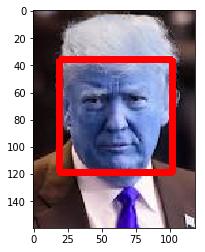

In [21]:
[(x1,y1,w1,h1)]=trump_face
cv2.rectangle(trump_image,(x1,y1),(x1+w1,y1+h1),(255,0,0),4)
cv2.imshow('/Users/r17935avinash/Desktop/Webinar Session/trump_image.jpg',trump_image)
trump_encodings=np.array(face_recognition.face_encodings(trump_image[y1:y1+h1,x1:x1+w1]))
plt.imshow(trump_image)
print(trump_encodings.shape)

In [8]:
[(x1,y1,w1,h1)]=hillary_face
cv2.rectangle(hillary_image,(x1,y1),(x1+w1,y1+h1),(255,0,0),4)
hillary_encodings=np.array(face_recognition.face_encodings(hillary_image[y1:y1+h1,x1:x1+w1]))
print(hillary_encodings.shape)

(1, 128)


In [9]:
#Create a Dictionary for each of the face embeddings
pict_dict={
    'Hillary Clinton' : hillary_encodings ,
    'Barack Obama' : obama_encodings      ,
    'Donald Trump' : trump_encodings
}



In [11]:
target_img=cv2.imread("/Users/r17935avinash/Desktop/Webinar Session/images.jpeg")
black_white_target_img=cv2.cvtColor(target_img, cv2.COLOR_RGB2GRAY )

faces = facecascade.detectMultiScale(black_white_target_img,1.2,4) 
for (x1,y1,w1,h1) in faces:
    cv2.rectangle(target_img,(x1,y1),(x1+w1,y1+h1),(255,0,0),2)
    #temp_encodings=np.array(face_recognition.face_encodings(target_img[y1:y1+h1,x1:x1+w1]))
    #print(temp_encodings)
    
cv2.imshow("/Users/r17935avinash/Desktop/Webinar Session/asd.jpg",target_img)


In [12]:
print(faces)

[[169  13  91  91]
 [ 15  13 103 103]]


In [13]:
def calculate_euclidean_distance(ar1,ar2):
    diff=ar1-ar2
    total=np.dot(diff,diff.T)
    return total/128

In [14]:
faces

array([[169,  13,  91,  91],
       [ 15,  13, 103, 103]], dtype=int32)

In [15]:
pict_dict['Barack Obama']

array([[-0.08994702,  0.10155268,  0.06531928, -0.05069978, -0.01050358,
         0.00218656, -0.08843366, -0.09294417,  0.17103715, -0.10253305,
         0.25795877,  0.07637933, -0.21020982, -0.15250312,  0.06867048,
         0.1336689 , -0.19616021, -0.08396179, -0.10560477, -0.10049482,
         0.05218339, -0.02412942,  0.08478904, -0.01748572, -0.12213508,
        -0.35495126, -0.05791958, -0.09022523,  0.03511389, -0.13230202,
        -0.06176857, -0.01737522, -0.18930565, -0.06315563,  0.00277223,
        -0.0225497 , -0.01441878, -0.04226244,  0.19515228,  0.04083459,
        -0.13248356,  0.08087671,  0.03040649,  0.15690391,  0.28565788,
         0.05444432,  0.03087757, -0.08191343,  0.12897429, -0.20626132,
         0.02218656,  0.16940551,  0.11981059,  0.05917258,  0.09323794,
        -0.18810496, -0.01437813,  0.12454466, -0.13557094,  0.02664218,
         0.02152996, -0.06442823, -0.05764709,  0.04126643,  0.1808285 ,
         0.12458211, -0.11025329, -0.13784337,  0.1

In [16]:
for (x1,y1,w1,h1) in faces:
    cv2.rectangle(target_img,(x1,y1),(x1+w1,y1+h1),(255,0,0),4)
    temp_encodings=np.array(face_recognition.face_encodings(target_img[y1:y1+h1,x1:x1+w1]))
    min_ed=1
    min_label=" "
    for word in pict_dict.keys():
        #print(word)
        distance=calculate_euclidean_distance(temp_encodings,pict_dict[word])
        #print(distance)
        if( distance <= min_ed):
            min_ed = distance
            min_label = word
            #print(min_ed)
    cv2.putText(target_img,min_label, (x1-15, y1+h1+20), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (127, 248, 23),2,cv2.LINE_AA)
        
    

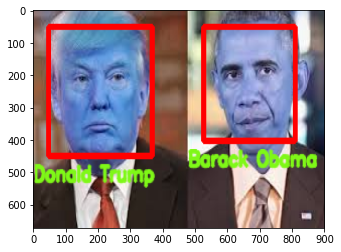

In [20]:
target_img=cv2.resize(target_img,(300*3,224*3))
cv2.imshow("/Users/r17935avinash/Desktop/Webinar Session/window_final",target_img)
plt.imshow(target_img)